# Parkinson's Disease detection

**Credit: [AITS cainvas](http://cainvas.ai-tech.systems/) authors**

![](https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/parkinsons.gif)

Detecting parkinson's disease in patients using speeech signals

In [1]:
import pandas as pd
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import random
import matplotlib.pyplot as plt

## Dataset

#### Source:

[kaggle](https://www.kaggle.com/nidaguler/parkinsons-data-set)

The dataset was created by Max Little of the University of Oxford, in
collaboration with the National Centre for Voice and Speech, Denver,
Colorado, who recorded the speech signals. The original study published the
feature extraction methods for general voice disorders.

## Dataset information

This dataset is composed of a range of biomedical voice measurements from
31 people, 23 with Parkinson's disease (PD). Each column in the table is a
particular voice measure, and each row corresponds one of 195 voice
recording from these individuals. The main aim of the data
is to discriminate healthy people from those with PD, according to "status"
column which is set to 0 for healthy and 1 for PD.

In [2]:
parkinson = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/parkinsons.data')
parkinson

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
# shuffling the dataset because the status column is ordered above

parkinson = parkinson.sample(frac=1, random_state=13)
parkinson

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
78,phon_R01_S20_1,95.385,102.145,90.264,0.00608,0.00006,0.00331,0.00332,0.00994,0.03202,...,0.05408,0.01062,21.875,1,0.644954,0.779612,-5.115212,0.249494,2.017753,0.260015
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
42,phon_R01_S10_1,237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,...,0.03104,0.00740,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
87,phon_R01_S21_4,176.281,227.381,125.610,0.00520,0.00003,0.00287,0.00312,0.00862,0.06511,...,0.11012,0.04824,13.922,1,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968
101,phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,phon_R01_S24_2,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,...,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
16,phon_R01_S04_5,144.188,349.259,82.764,0.00544,0.00004,0.00211,0.00292,0.00632,0.02047,...,0.02908,0.01859,22.333,1,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164
74,phon_R01_S19_3,110.793,128.101,107.316,0.00494,0.00004,0.00260,0.00283,0.00780,0.02442,...,0.04295,0.00479,25.438,1,0.437031,0.815908,-5.313360,0.201861,2.225815,0.244512
176,phon_R01_S43_6,116.388,129.038,108.970,0.00346,0.00003,0.00169,0.00213,0.00507,0.01725,...,0.02623,0.00415,26.143,0,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429


In [4]:
# looking into the classes

parkinson['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

It is an unbalanced dataset. We will need f1 score to determine the performance of our model.

## Processing the data

In [5]:
input_columns = list(parkinson.columns)
input_columns.remove('status')
input_columns.remove('name')

#output_columns = ['status']    # use for sigmoid activated last layer of model
output_columns = ['no', 'yes']    # use for one hot encoded data in the last layer

print("Input columns: ", input_columns)
print("Output columns: ", output_columns)

Input columns:  ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
Output columns:  ['no', 'yes']


In [6]:
parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
# The range of values in different attributes vary a lot. Thus, we represent them on the same scale using MinMaxScaler

scaler = MinMaxScaler()
parkinson[input_columns] = scaler.fit_transform(parkinson[input_columns])
parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.383623,0.193841,0.292748,0.144233,0.146083,0.126513,0.135389,0.126504,0.184126,0.162080,...,0.214101,0.077019,0.546410,0.753846,0.564574,0.572963,0.412332,0.495783,0.426421,0.335549
std,0.240959,0.186761,0.250564,0.154007,0.137636,0.142956,0.147855,0.142934,0.172147,0.160129,...,0.195527,0.128652,0.179865,0.431878,0.242525,0.220456,0.197110,0.187758,0.170294,0.186649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170220,0.066786,0.108323,0.056544,0.051383,0.047206,0.050375,0.047279,0.063584,0.052177,...,0.071222,0.016790,0.437170,1.000000,0.384375,0.400291,0.273893,0.378364,0.300658,0.192433
50%,0.351961,0.150411,0.223606,0.103558,0.090909,0.087669,0.094855,0.087494,0.122604,0.111750,...,0.158685,0.035045,0.554499,1.000000,0.558550,0.589516,0.405738,0.478618,0.417393,0.309661
75%,0.549775,0.249162,0.429160,0.180591,0.209486,0.151975,0.162647,0.151951,0.258764,0.217749,...,0.302703,0.079543,0.676034,1.000000,0.772299,0.747391,0.527720,0.614472,0.539698,0.431709
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# one hot encoding the output columns

parkinson[['no', 'yes']] = pd.get_dummies(parkinson.status)
parkinson

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,no,yes
78,phon_R01_S20_1,0.041054,0.000000,0.142711,0.139771,0.209486,0.126686,0.128617,0.126826,0.205222,...,0.545964,1,0.906209,0.818028,0.515241,0.547523,0.264458,0.446279,0,1
190,phon_R01_S50_2,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,...,0.450134,0,0.447684,0.333127,0.257894,0.260408,0.549049,0.183318,1,0
42,phon_R01_S10_1,0.866806,0.296357,0.919727,0.041296,0.011858,0.048651,0.048232,0.048643,0.072850,...,0.580956,0,0.113145,0.318279,0.118322,0.207947,0.441997,0.104578,1,0
87,phon_R01_S21_4,0.512004,0.255644,0.346207,0.111817,0.090909,0.105491,0.117899,0.105635,0.507303,...,0.222751,1,0.808025,0.663550,0.442946,0.660204,0.762172,0.365408,0,1
101,phon_R01_S24_5,0.233554,0.098603,0.058471,0.439327,0.446640,0.403179,0.437835,0.403275,0.476173,...,0.268999,1,0.894202,0.275073,0.680218,0.684097,0.540509,0.646901,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,phon_R01_S24_2,0.218068,0.078410,0.176920,0.384371,0.407115,0.365125,0.301715,0.365067,0.340971,...,0.284158,1,0.733677,0.464571,0.507293,0.440936,0.453018,0.447025,0,1
16,phon_R01_S04_5,0.325169,0.504433,0.099531,0.119441,0.130435,0.068882,0.107181,0.068711,0.099781,...,0.564578,1,0.725207,0.280511,0.456512,0.525619,0.374227,0.359600,0,1
74,phon_R01_S19_3,0.130755,0.052984,0.240883,0.103558,0.130435,0.092486,0.102358,0.092471,0.135841,...,0.690766,1,0.421066,0.962630,0.479415,0.440294,0.357017,0.414170,0,1
176,phon_R01_S43_6,0.163327,0.054897,0.250406,0.056544,0.090909,0.048651,0.064845,0.048643,0.070385,...,0.719418,0,0.244206,0.752811,0.352217,0.231827,0.258659,0.269019,1,0


In [9]:
# Using 80-10-10 split of train-val-test data

train_df, val_df = train_test_split(parkinson, train_size=0.8)    # 80-20 split
val_df, test_df = train_test_split(val_df, train_size = 0.5)    #splitting the 20% into 2 halves

print("Train dataset")
print(len(train_df))
print(train_df['status'].value_counts())

print("Val dataset")
print(len(val_df))
print(val_df['status'].value_counts())

print("Test dataset")
print(len(test_df))
print(test_df['status'].value_counts())

Train dataset
156
1    118
0     38
Name: status, dtype: int64
Val dataset
19
1    16
0     3
Name: status, dtype: int64
Test dataset
20
1    13
0     7
Name: status, dtype: int64


In [10]:
# splitting into input and output

xtrain, ytrain = np.array(train_df[input_columns]).astype('float32'), np.array(train_df[output_columns])
xval, yval = np.array(val_df[input_columns]).astype('float32'), np.array(val_df[output_columns])
xtest, ytest = np.array(test_df[input_columns]).astype('float32'), np.array(test_df[output_columns])

## Model

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation="relu", input_shape = xtrain[0].shape))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [12]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(xtrain, ytrain, epochs = 32, batch_size = 8, validation_data=(xval, yval))

Epoch 1/32
20/20 [==============================] - 0s 10ms/step - loss: 0.5376 - accuracy: 0.7372 - val_loss: 0.3741 - val_accuracy: 0.8421
Epoch 2/32
20/20 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.7885 - val_loss: 0.3623 - val_accuracy: 0.8947
Epoch 3/32
20/20 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8141 - val_loss: 0.3554 - val_accuracy: 0.8421
Epoch 4/32
20/20 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8333 - val_loss: 0.3512 - val_accuracy: 0.8421
Epoch 5/32
20/20 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8654 - val_loss: 0.3446 - val_accuracy: 0.8421
Epoch 6/32
20/20 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8526 - val_loss: 0.3482 - val_accuracy: 0.8947
Epoch 7/32
20/20 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8782 - val_loss: 0.3086 - val_accuracy: 0.8947
Epoch 8/32
20/20 [=

In [14]:
model.evaluate(xtest, ytest)

1/1 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.9500


[0.15453146398067474, 0.949999988079071]

In [15]:
ypred = model.predict_classes(xtest)

confusion_matrix(np.argmax(ytest, axis = 1), ypred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[ 6,  1],
       [ 0, 13]])

From the confusion matrix, it is evident that the high accuracy is not only due to random predictions towards the majority class. Our model is well trained.

## Plotting the metrics

In [16]:
def plot(history, variable, variable1):
    plt.plot(range(len(history[variable])), history[variable])
    plt.plot(range(len(history[variable1])), history[variable1])
    plt.legend([variable, variable1])
    plt.title(variable)

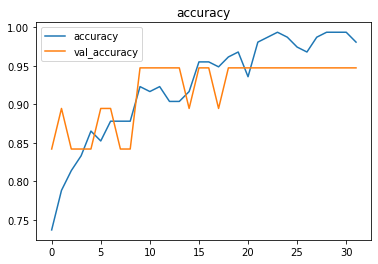

In [17]:
plot(history.history, "accuracy", "val_accuracy")

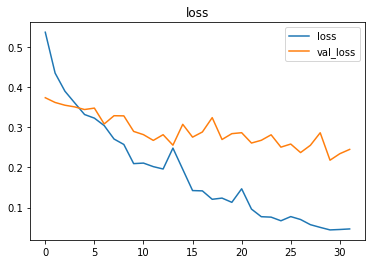

In [18]:
plot(history.history, "loss", "val_loss")

## Prediction

In [19]:
# pick random test data sample from one batch
x = random.randint(0, len(xtest)- 1)

pred = model.predict(xtest[x].reshape(1, -1))
diagnosis = np.argmax(pred[0])

print("Actual diagnosis: ", output_columns[np.argmax(ytest[x])])
print("Model diagnosis: ", output_columns[diagnosis], " with probability ", pred[0][diagnosis])

Actual diagnosis:  yes
Model diagnosis:  yes  with probability  0.99171454


## deepC

In [20]:
model.save('parkinsons.h5')

!deepCC parkinsons.h5

reading [keras model] from 'parkinsons.h5'
Saved 'parkinsons.onnx'
reading onnx model from file  parkinsons.onnx
Model info:
  ir_vesion :  4 
  doc       : 
WARN (ONNX): terminal (input/output) dense_input's shape is less than 1.
             changing it to 1.
WARN (ONNX): terminal (input/output) dense_3's shape is less than 1.
             changing it to 1.
WARN (GRAPH): found operator node with the same name (dense_3) as io node.
running DNNC graph sanity check ... passed.
Writing C++ file  parkinsons_deepC/parkinsons.cpp
INFO (ONNX): model files are ready in dir parkinsons_deepC
g++ -std=c++11 -O3 -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/packages/eigen-eigen-323c052e1731 parkinsons_deepC/parkinsons.cpp -o parkinsons_deepC/parkinsons.exe
Model executable  parkinsons_deepC/parkinsons.exe


In [22]:
# pick random test data sample from one batch
x = random.randint(0, len(xtest)- 1)

np.savetxt('sample.data', xtest[x].reshape(1, -1))

# run exe with input
!parkinsons_deepC/parkinsons.exe sample.data

pred = np.loadtxt('dense_3.out')
diagnosis = np.argmax(pred)

print("Actual diagnosis: ", output_columns[np.argmax(ytest[x])])
print("Model diagnosis: ", output_columns[diagnosis], " with probability ", pred[diagnosis])

reading file sample.data.
writing file dense_3.out.
Actual diagnosis:  yes
Model diagnosis:  yes  with probability  1.0
